In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy.stats import norm
from scipy import integrate
import random
import statistics as stat
import matplotlib.pyplot as plt

In [2]:
def get_geo_path(T,r,d,sigma, S0,steps):
    dt= T/steps
    t = np.linspace(0,T,steps)
    Bt = [0]+ np.random.standard_normal(size=steps)
    Bt = np.cumsum(Bt)*np.sqrt(dt)
    path = S0*np.exp(((r-d)-0.5*sigma**2)*t+sigma*Bt)
    plt.plot(t,path)
    return path


In [3]:
# BS Delta of a call option
def get_delta_call(T,r,d,S0,K,sigma):
    d1 = (np.log(S0/K)+(r+0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1-sigma*np.sqrt(T)
    delta= norm.cdf(d1)
    return delta

In [4]:
# Price of Call Option function
def get_call(T, r, d, S0,K, sigma):
    if K==0 or T==0 or sigma ==0:
        print('Not a valid input')
    elif d == 0:
        d1 = (np.log(S0/K)+(r+0.5*sigma**2)*T) / (sigma*np.sqrt(T))
        d2 = d1-sigma*np.sqrt(T)
        call = S0*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)
        return call
    elif d < 0:
        print('Not a valid dividend input')
    else:
        d1 = (np.log(S0/K)+(r+0.5*sigma**2)*T) / (sigma*np.sqrt(T))
        d2 = d1-sigma*np.sqrt(T)
        print(d1)
        call = np.exp(-d*T)*S0*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)
        return(call)

## Arbitrary time dependent vol path
sigma(t)= {.17 for t<0.2 ||
           .15 for 0.2<=t<0.4 ||
           .13 for 0.4<=t<0.6 ||
           .12 for 0.6<=t<1} 
* t = time elapsed since start
* tau = time to maturity

[13.063945294843604, 0.1354160256395084, 0.14492729752751016, 0.16456812165989707, 0.1963068099592157, 0.2010133060430309, 0.21619744062623247, 0.24641218621902902, 0.24546838160577658, 0.2581231402946189, 0.28825816742000115, 0.28317045616797093]


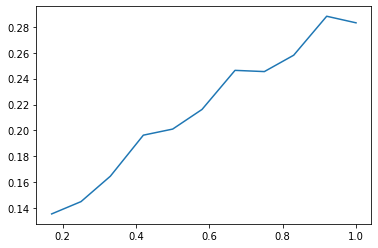

In [56]:
#hedging simulation with time dependent vol using root-mean-square vol
#assuming constant sigma(s) function
tau =[1.00,0.92,0.83,0.75,0.67,0.58,0.50,0.42,0.33,0.25,0.17,0.08,0.000001]
sigma(t)=[0.17,0.15,0.13,0.12]
z=[0]

for i in range (0,12):
    z.append(np.random.randn())
S=[100]
periods = 12
r=0
K=106
T=1
sigma=0.17
C0=get_call(T=1, r=0, d=0, S0=100,K=106, sigma=0.17)
d1=[]
delta=[]
ds=[]
portfolio=[]
bs=[]
pnl=[]
variance=[]
rms_sigma1=[]
rms_sigma2=[]
tau_rev=tau[::-1]


    
# root mean square vol
for i in range(0,len(tau)-1):
    sig = lambda sigma: sigma**2
    coeff=1/(tau_rev[i])
    rms_sig=((integrate.quad(sig,tau_rev[i],tau_rev[i+1])[0]))
    rms_sig=np.sqrt(coeff*rms_sig)
    rms_sigma2.append(rms_sig)


plt.plot(tau_rev[2:13],rms_sigma2[1:13])

print(rms_sigma2)


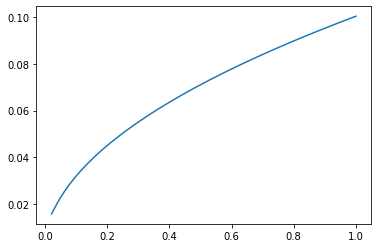

In [47]:
time=np.linspace(0.001,1,100)

sigma=0.17
rms_sigma2=[]
# root mean square vol
for i in range(0,len(time)-1):
    sig = lambda sigma: sigma**2
    coeff=1/(time[i])
    rms_sig=((integrate.quad(sig,time[i],time[i+1])[0]))
    rms_sig=np.sqrt(coeff*rms_sig)
    rms_sigma2.append(rms_sig)


plt.plot(time[2:],rms_sigma2[1:])
